In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [17]:
df = pd.read_csv("C:/Users/user/Desktop/Data science class/dataset_emmission.csv")
df

,date_surveyed,daily_co2_emmission,Area_Surveyed
0,05-06-2022,0.000369,Mile 3
1,06-06-2022,0.000493,Mile 3
2,07-06-2022,0.000475,Mile 3
3,08-06-2022,0.000541,Mile 3
4,09-06-2022,0.000517,Mile 3
...,...,...,...
804,12-08-2022,0.108655,Choba Junction
805,13-08-2022,0.101236,Choba Junction
806,14-08-2022,0.105978,Choba Junction
807,15-08-2022,0.098942,Choba Junction


In [11]:
df[df["Area_Surveyed"] == 'Rumuola'].tail()

,date_surveyed,daily_co2_emmission,Area_Surveyed
205,16-10-2022,0.022815,Rumuola
206,17-10-2022,0.022325,Rumuola
207,18-10-2022,0.023642,Rumuola
208,19-10-2022,0.021800,Rumuola
209,20-10-2022,0.021588,Rumuola


In [12]:
df["Area_Surveyed"].unique()

array(['Mile 3', 'Rumuola', 'Garrison', 'Artillery', 'Borikiri', 'Mile 1',
       'Eleme Junction', 'Choba Junction'], dtype=object)

In [18]:
day_val = []
month_val = []
year_val = []
for i in df["date_surveyed"].values:
    day = i.split("-")[0]
    month = i.split("-")[1]
    year = i.split("-")[2]
    day_val.append(day)
    month_val.append(month)
    year_val.append(year)
df["Day"] = day_val
df["Month"] = month_val
df["Year"] = year_val

In [23]:
df.head()

,date_surveyed,daily_co2_emmission,Area_Surveyed,Day,Month,Year,date
0,05-06-2022,0.000369,Mile 3,05,06,2022,2022-06-05
1,06-06-2022,0.000493,Mile 3,06,06,2022,2022-06-06
2,07-06-2022,0.000475,Mile 3,07,06,2022,2022-06-07
3,08-06-2022,0.000541,Mile 3,08,06,2022,2022-06-08
4,09-06-2022,0.000517,Mile 3,09,06,2022,2022-06-09


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_surveyed        809 non-null    object 
 1   daily_co2_emmission  809 non-null    float64
 2   Area_Surveyed        809 non-null    object 
 3   Day                  809 non-null    object 
 4   Month                809 non-null    object 
 5   Year                 809 non-null    object 
dtypes: float64(1), object(5)
memory usage: 38.1+ KB


In [21]:
df["date"] = pd.to_datetime(df["Year"] + "-" + df["Month"] + "-" + df["Day"])
df.head()

,date_surveyed,daily_co2_emmission,Area_Surveyed,Day,Month,Year,date
0,05-06-2022,0.000369,Mile 3,05,06,2022,2022-06-05
1,06-06-2022,0.000493,Mile 3,06,06,2022,2022-06-06
2,07-06-2022,0.000475,Mile 3,07,06,2022,2022-06-07
3,08-06-2022,0.000541,Mile 3,08,06,2022,2022-06-08
4,09-06-2022,0.000517,Mile 3,09,06,2022,2022-06-09


In [8]:
def get_area_surveyed(area, df):
    data_vals = df[df["Area_Surveyed"] == area]
    new_df_vals = data_vals.drop(["Area_Surveyed","date_surveyed", "Month","Year"], axis=1)
    return new_df_vals




def linear_reg_(new_df_vals):
    target = new_df_vals.drop(["date","daily_co2_emmission"], axis=1)
    predictor = new_df_vals["daily_co2_emmission"]
    times =  target         
    values = predictor
    # Reshape the data into a 2D array
    X = times
    y = values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, y_pred)
    intercept = model.intercept_
    coefficients = model.coef_
    print("Mean Absolute Error: ", mae)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2_score: ", r2_sc)
    print("Intercept: ", intercept)
    print("Coefficients: ", coefficients)
    


    
def pred_linear_reg_(new_df_vals, start_date, end_date):
    target = new_df_vals.drop(["date","daily_co2_emmission"], axis=1)
    predictor = new_df_vals["daily_co2_emmission"]
    times =  target         
    values = predictor
    # Reshape the data into a 2D array
    X = times
    y = values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = LinearRegression()
    model.fit(X_train, y_train)

    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    date_cols = pd.DataFrame(date_range, columns=["date"])
    day_val = date_cols["date"].dt.day.values
    array_pred = [model.predict([[i]]) for i in day_val]
    df_pred = pd.DataFrame(array_pred, columns=["daily_co2_emmission"])
    pred_df = pd.concat([date_cols, df_pred], axis=1)
    return pred_df

def plot_pred(new_df_vals, pred_df):
    df = new_df_vals[["date", "daily_co2_emmission"]]
    df_plot = df.append(pred_df)
    print(pred_df)
    plot_data = df_plot.reset_index().drop("index", axis=1)
    plot_data.plot(x="date", y="daily_co2_emmission", kind="line")

#### Location One

Mean Absolute Error:  0.00021817478941113424
Mean Squared Error:  7.845263233304163e-08
Root Mean Squared Error:  0.00028009397054031996
R2_score:  -0.0407447240499581
Intercept:  0.0009231112598707923
Coefficients:  [-2.29654274e-06]


C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAEC

        date  daily_co2_emmission
0 2022-08-16             0.000865
1 2022-08-17             0.000865
2 2022-08-18             0.000865
3 2022-08-19             0.000865
4 2022-08-20             0.000865
5 2022-08-21             0.000865
None


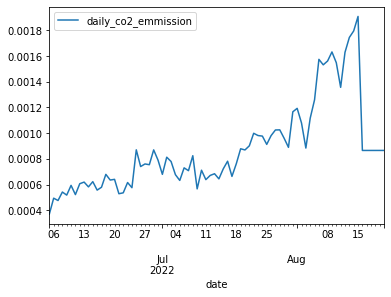

In [9]:
location = "Mile 3"
area_data = get_area_surveyed(area=location, df=df)
lr = linear_reg_(new_df_vals=area_data)
pred_vals = pred_linear_reg_(new_df_vals=area_data, start_date='2022-08-16', end_date='2022-08-21')
plot_pred(new_df_vals=area_data, pred_df=pred_vals)
print(lr)


#### Location Two

Mean Absolute Error:  0.00961930449480653
Mean Squared Error:  0.0001107255489387796
Root Mean Squared Error:  0.010522620820821189
R2_score:  -0.06485651292434724
Intercept:  0.016818524396686022
Coefficients:  [-9.69160342e-05]
        date  daily_co2_emmission
0 2022-08-21             0.015115
1 2022-08-22             0.015113
2 2022-08-23             0.015110
3 2022-08-24             0.015108
4 2022-08-25             0.015106
5 2022-08-26             0.015104


C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAEC

None


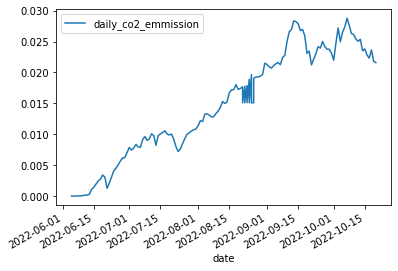

In [12]:
location = 'Rumuola'
area_data = get_area_surveyed(area=location, df=df)
lr = linear_reg_(new_df_vals=area_data)
pred_vals = pred_linear_reg_(new_df_vals=area_data, start_date='2022-08-21', end_date='2022-08-26')
plot_pred(new_df_vals=area_data, pred_df=pred_vals)
print(lr)

Mean Absolute Error:  0.0004432369033882247
Mean Squared Error:  2.789100265501063e-07
Root Mean Squared Error:  0.0005281193298394846
R2_score:  -0.06818036257945548
Intercept:  0.0013277376231603075
Coefficients:  [-2.05339996e-06]
        date  daily_co2_emmission
0 2022-08-08             0.001228
1 2022-08-09             0.001234
2 2022-08-10             0.001240
3 2022-08-11             0.001246
4 2022-08-12             0.001252
5 2022-08-13             0.001258


C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAEC

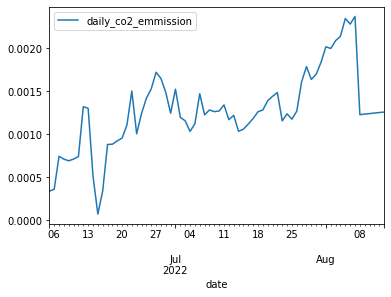

In [13]:
location = 'Garrison'
area_data = get_area_surveyed(area=location, df=df)
lr = linear_reg_(new_df_vals=area_data)
pred_vals = pred_linear_reg_(new_df_vals=area_data, start_date='2022-08-8', end_date='2022-08-13')
plot_pred(new_df_vals=area_data, pred_df=pred_vals)
lr

Mean Absolute Error:  0.039211122904676446
Mean Squared Error:  0.0020769866311613006
Root Mean Squared Error:  0.04557396878878666
R2_score:  0.26742434218230127
Intercept:  0.07572227561010952
Coefficients:  [0.00370817]
        date  daily_co2_emmission
0 2022-08-17             0.133866
1 2022-08-18             0.137341
2 2022-08-19             0.140816
3 2022-08-20             0.144291
4 2022-08-21             0.147766
5 2022-08-22             0.151241
None


C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAECO SUPER GLOBAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LALAEC

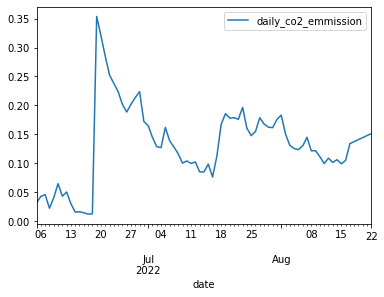

In [14]:
location = 'Choba Junction'
area_data = get_area_surveyed(area=location, df=df)
lr = linear_reg_(new_df_vals=area_data)
pred_vals = pred_linear_reg_(new_df_vals=area_data, start_date='2022-08-17', end_date='2022-08-22')
plot_pred(new_df_vals=area_data, pred_df=pred_vals)
print(lr)

In [15]:
#pred_vals = pred_linear_reg_(new_df_vals=area_data, start_date='2022-08-16', end_date='2022-08-21')

In [16]:
pred_vals

,date,daily_co2_emmission
0,2022-08-17,0.133866
1,2022-08-18,0.137341
2,2022-08-19,0.140816
3,2022-08-20,0.144291
4,2022-08-21,0.147766
5,2022-08-22,0.151241


C:\Users\LALAECO SUPER GLOBAL\AppData\Local\Temp\ipykernel_9880\2568921566.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_plot = df.append(pred_df)


        date  daily_co2_emmission
0 2022-08-17             0.133866
1 2022-08-18             0.137341
2 2022-08-19             0.140816
3 2022-08-20             0.144291
4 2022-08-21             0.147766
5 2022-08-22             0.151241


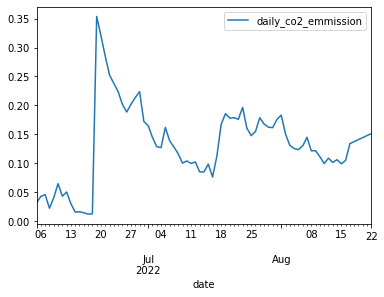

In [17]:
plot_pred(new_df_vals=area_data, pred_df=pred_vals)